In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [5]:
import pykitti
import PIL
import matplotlib.pyplot as plt
import os

import numpy as np


basedir = 'dataset'
print(os.listdir(basedir))
sequence = '01'

['poses', 'sequences']


In [6]:
dataset = pykitti.odometry(basedir, sequence, frames=range(0, 20, 5))

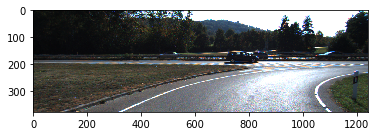

In [7]:
plt.imshow(dataset.get_cam2(0))

(50, 150, 3)


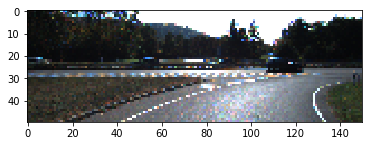

In [8]:
image_pil = dataset.get_cam2(1)
image_pil = image_pil.resize(size=(150,50))
image = np.array(image_pil)
print(image.shape)
plt.imshow(image)

In [9]:
dataset = pykitti.odometry(basedir, sequence)
len(dataset.cam2_files)

1101

In [11]:
from deep_visual_odometry.kitti_utils import KITTIdata
kitti_data = KITTIdata(basedir, sequences = ['00','01'], img_size=(150,50))
print(kitti_data.dataset_len)

UnboundLocalError: local variable 'dataset' referenced before assignment

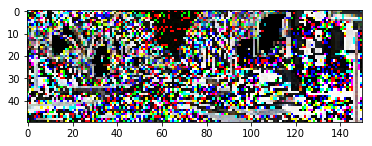

In [18]:
series, _, _ = kitti_data.get_series(sequence_len = 100)
plt.imshow(series[0,:,:,3:6])

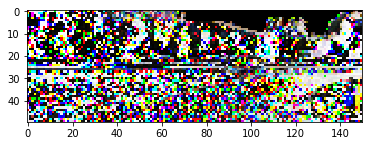

In [9]:
series, _, _ = kitti_data.get_series(sequence_len = 10)
plt.imshow(series[0,:,:,3:6])

As can be seen above the series alternates between sequences, if only sequences need to be used then provide them as arguments while calling get_series().

In [11]:
series_inputs, velocities, poses = kitti_data.get_series(sequence_len=100)

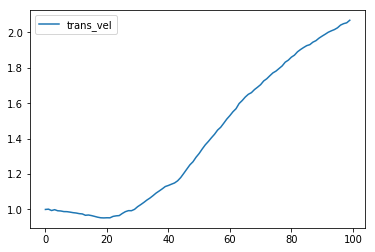

In [12]:
plt.plot(velocities[:,0],label = 'trans_vel')
plt.legend()

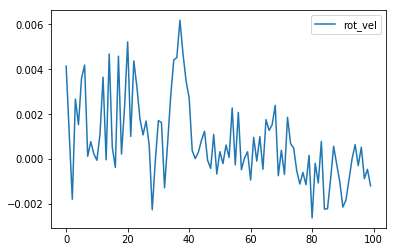

In [13]:
plt.plot(velocities[:,1],label = 'rot_vel')
plt.legend()

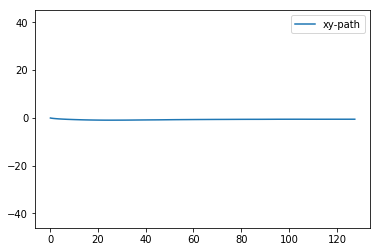

In [14]:
plt.plot(poses[:,0], poses[:,1], label = 'xy-path')
plt.axis('equal')
plt.legend()

In [16]:
np.random.seed(10)
np.random.choice(10,4,replace=False)

array([8, 2, 5, 6])

In [22]:
Xtrain, Ytrain = kitti_data.load_data_input_model()
print(Xtrain.shape)
print(Ytrain.shape)

(5640, 50, 150, 6)
(5640, 2)
